# Help Twitter Combat Hate Speech Using NLP and Machine Learning | Chaitanya GNB

# DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

# Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

# Analysis to be done: 

Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

# Tasks: 

1. Load the tweets file using read_csv function from Pandas package. 

2. Get the tweets into a list for easy text cleanup and manipulation.

3. To cleanup: 

    1. Normalize the casing.

    2. Using regular expressions, remove user handles. These begin with '@’.

    3. Using regular expressions, remove URLs.

    4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

    5. Remove stop words.

    6. Remove redundant terms like ‘amp’, ‘rt’, etc.

    7. Remove ‘#’ symbols from the tweet while retaining the term.

4. Extra cleanup by removing terms with a length of 1.

5. Check out the top terms in the tweets:

    1. First, get all the tokenized terms into one large list.

    2. Use the counter and find the 10 most common terms.

6. Data formatting for predictive modeling:

    1. Join the tokens back to form strings. This will be required for the vectorizers.

    2. Assign x and y.

    3. Perform train_test_split using sklearn.

7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

    1. Import TF-IDF  vectorizer from sklearn.

    2. Instantiate with a maximum of 5000 terms in your vocabulary.

    3. Fit and apply on the train set.

    4. Apply on the test set.

8. Model building: Ordinary Logistic Regression

    1. Instantiate Logistic Regression from sklearn with default parameters.

    2. Fit into  the train data.

    3. Make predictions for the train and the test set.

9. Model evaluation: Accuracy, recall, and f_1 score.

    1. Report the accuracy on the train set.

    2. Report the recall on the train set: decent, high, or low.

    3. Get the f1 score on the train set.

10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

    1. Adjust the appropriate class in the LogisticRegression model.

11. Train again with the adjustment and evaluate.

    1. Train the model on the train set.

    2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

12. Regularization and Hyperparameter tuning:

    1. Import GridSearch and StratifiedKFold because of class imbalance.

    2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

    3. Use a balanced class weight while instantiating the logistic regression.

13. Find the parameters with the best recall in cross validation.

    1. Choose ‘recall’ as the metric for scoring.

    2. Choose stratified 4 fold cross validation scheme.

    3. Fit into  the train set.

14. What are the best parameters?

15. Predict and evaluate using the best estimator.

    1. Use the best estimator from the grid search to make predictions on the test set.

    2. What is the recall on the test set for the toxic comments?

    3. What is the f_1 score?

In [1]:
# Import required libraries
import numpy as np
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

import re, os
import random

In [2]:
# 1. Load the tweets file using read_csv function from Pandas package. 
data = pd.read_csv('TwitterHate.csv') 

In [3]:
print(data.shape)

(31962, 3)


In [4]:
data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

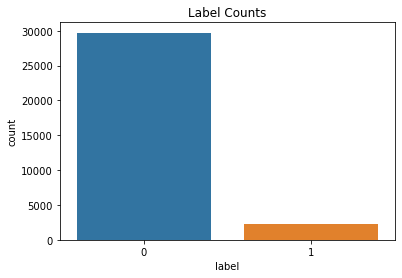

In [7]:
#bar graph to count positive negative label
fig1 = sns.countplot(x= 'label',data = data)
plt.title('Label Counts')
plot = fig1.get_figure()

In [8]:
data['label'] = data['label'].astype('category')

In [9]:
data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [10]:
data['length'] = data['tweet'].apply(len)
data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      31962 non-null  int64   
 1   label   31962 non-null  category
 2   tweet   31962 non-null  object  
 3   length  31962 non-null  int64   
dtypes: category(1), int64(2), object(1)
memory usage: 780.5+ KB


In [12]:
data['cleaned_tweet'] = data.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))
data['hashtags'] = data.tweet.apply(lambda x: ' '.join([word[1:] for word in x.split() if word.startswith('#')]))

In [13]:
data['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in data['tweet']]

In [14]:
data.head(10)

,id,label,tweet,length,cleaned_tweet,hashtags,text_lem
0,1,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so selfi...,run,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause they...,lyft disapointed getthanked,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty,21,bihday your majesty,,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ur...,model,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,39,factsguide: society now #motivation,motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,116,[2/2] huge fan fare and big talking before the...,allshowandnogo,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,74,camping tomorrow dannyâ¦,,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,143,the next school year is the year for exams.ð...,school exams hate imagine actorslife revolutio...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won!!! love the land!!! #allin #cavs #champ...,allin cavs champions cleveland clevelandcavaliers,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,50,welcome here ! i'm it's so #gr8 !,gr8,user user welcome here i m it s so gr...


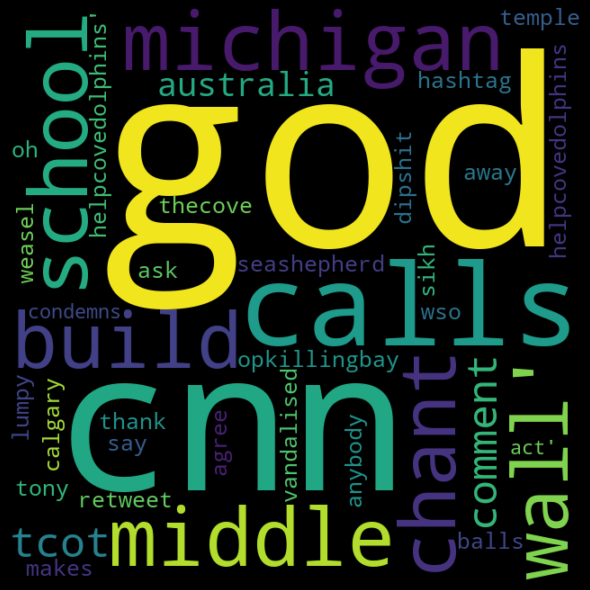

In [15]:
comments = data['cleaned_tweet'].loc[data['label']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

C:\Users\india\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



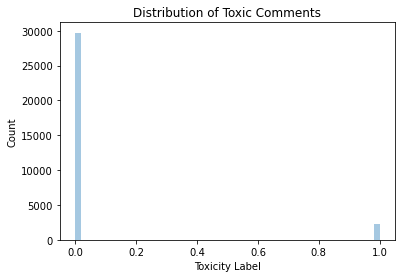

In [16]:
fig = sns.distplot(data['label'], kde=False)
plt.xlabel("Toxicity Label")
plt.ylabel("Count")
plt.title("Distribution of Toxic Comments")
plt.show(fig)

In [17]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in data['cleaned_tweet'][data['label'] == 0]])
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]

pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

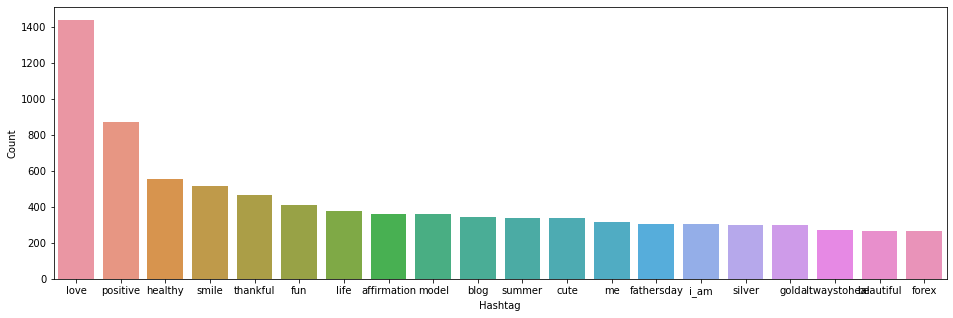

In [18]:
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [19]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in data['cleaned_tweet'][data['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

C:\Users\india\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 128 missing from current font.

C:\Users\india\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 128 missing from current font.



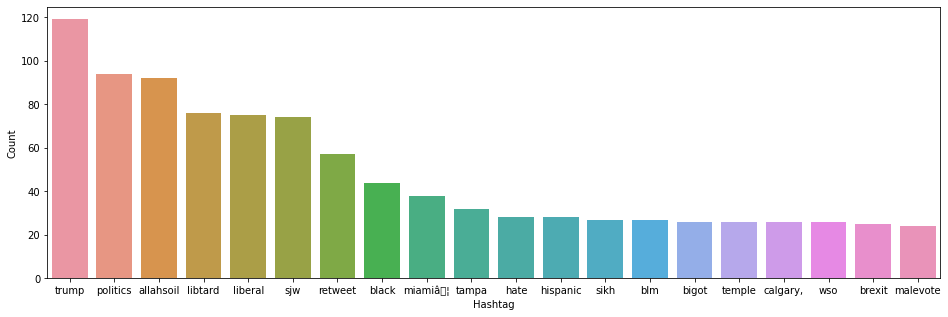

In [20]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()

Normal words


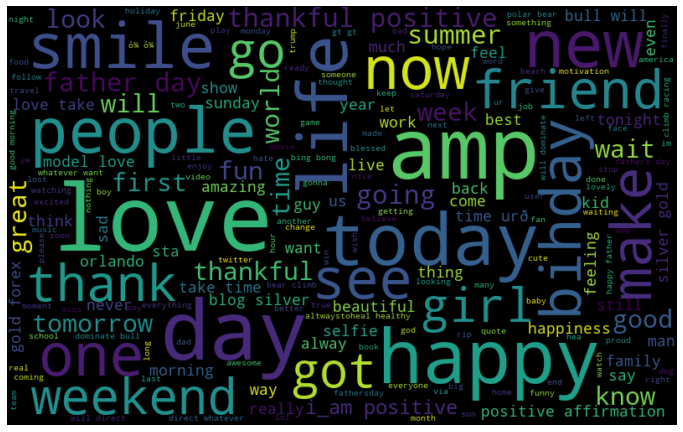

In [21]:
normal_words = ' '.join([word for word in data['cleaned_tweet'][data['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Negative words


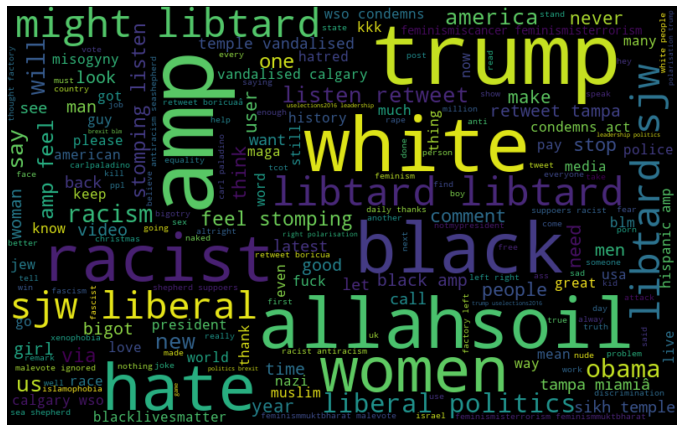

In [22]:
negative_words = ' '.join([word for word in data['cleaned_tweet'][data['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
#data.drop(['id','tweet'], inplace = True, axis = 1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             31962 non-null  int64   
 1   label          31962 non-null  category
 2   tweet          31962 non-null  object  
 3   length         31962 non-null  int64   
 4   cleaned_tweet  31962 non-null  object  
 5   hashtags       31962 non-null  object  
 6   text_lem       31962 non-null  object  
dtypes: category(1), int64(2), object(4)
memory usage: 1.5+ MB


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['cleaned_tweet'], data['label'], test_size = 0.3, random_state = 999929)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22373,)
(9589,)
(22373,)
(9589,)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [28]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [29]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(22373, 32847)
(22373, 32847)


In [30]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [31]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(9589, 32847)
(9589, 32847)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=500)

In [33]:
predictions = model.predict(x_test_tfidf)

In [34]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[8897,   42],
       [ 285,  365]], dtype=int64)

In [35]:
rf_f1 = f1_score(y_test,predictions)
rf_f1

0.6906338694418164

In [36]:
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_tfidf,y_train)

C:\Users\india\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
predict_xgb = model_bow.predict(x_test_tfidf)

In [38]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predict_xgb)

array([[8828,  111],
       [ 325,  325]], dtype=int64)

In [39]:
xgb_f1 = f1_score(y_test,predict_xgb)
xgb_f1

0.5985267034990791

In [40]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf,y_train)

LinearSVC()

In [41]:
predict_svm = lin_clf.predict(x_test_tfidf)

In [42]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predict_svm)

array([[8881,   58],
       [ 246,  404]], dtype=int64)

In [43]:
svm_f1=f1_score(y_test,predict_svm)
svm_f1

0.7266187050359711

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.9712    0.9957    0.9833      8939
           1     0.9104    0.5938    0.7188       650

    accuracy                         0.9685      9589
   macro avg     0.9408    0.7948    0.8511      9589
weighted avg     0.9671    0.9685    0.9654      9589



In [45]:
vect = CountVectorizer().fit(x_train)
vect

CountVectorizer()

In [46]:
print('Total features =', len(vect.get_feature_names()))
print(vect.get_feature_names()[::5000])

Total features = 33131
['00', 'butterfly', 'ev', 'insane', 'nbafinals2016', 'roosevelt', 'triggering']


In [47]:
X_train_vectorized = vect.transform(x_train)
X_train_vectorized

<22373x33131 sparse matrix of type '<class 'numpy.int64'>'
	with 249018 stored elements in Compressed Sparse Row format>

In [48]:
# Naive Bayes
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(x_test))
nb_f1 = f1_score(y_test, pred)
nb_f1

0.6016260162601627

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(x_test))
lr_f1 = f1_score(y_test, pred)
lr_f1

0.6566321730950141

In [50]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer().fit(x_train)
print('Total Features =', len(vect.get_feature_names()))
X_train_vectorized = vect.transform(x_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(x_test))
tfid_f1 = f1_score(y_test, pred)
tfid_f1

Total Features = 33131


0.4467592592592592

In [51]:
#ngrams
vect = CountVectorizer(min_df = 2, ngram_range = (1,2)).fit(x_train)
X_train_vectorized = vect.transform(x_train)
print('Total Features =', len(vect.get_feature_names()))

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(x_test))
cv_f1 = f1_score(y_test, pred)
cv_f1

Total Features = 36488


0.652591170825336

In [52]:
#Hyperparameter tuning
pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 50, 100],
              "countvectorizer__min_df": [1,2,3],
              "countvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'f1', n_jobs = -1)
grid.fit(x_train, y_train)
print('Best parameters:', grid.best_params_)

Best parameters: {'countvectorizer__min_df': 1, 'countvectorizer__ngram_range': (1, 1), 'logisticregression__C': 10}


C:\Users\india\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [53]:
results = {'RandomForest':rf_f1, 'XgBoost':xgb_f1,'SVM':svm_f1, 'NaiveBayes':nb_f1, 'LogisticRegression': lr_f1, 'TFID': tfid_f1, 'CountVectorizer': cv_f1}  
df = pd.DataFrame(results, index =['f1Score']) 
df

,RandomForest,XgBoost,SVM,NaiveBayes,LogisticRegression,TFID,CountVectorizer
f1Score,0.690634,0.598527,0.726619,0.601626,0.656632,0.446759,0.652591
